In [5]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [6]:
targetdir = '/Users/aimachine/Documents/KymoGraphLineScans/Result/'

Actinimage = '/Users/aimachine/Documents/KymoGraphLineScans/LineScanTime.tif'

Membraneimage = '/Users/aimachine/Documents/KymoGraphLineScans/LineScanTime-shift.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.212
#Enter the number of pixels to be included in the fit
FitaroundInside = 6
FitaroundOutside = 20
#Symmetric psf as input (nanometers)
psf = 0.131
inisigmaguess = psf

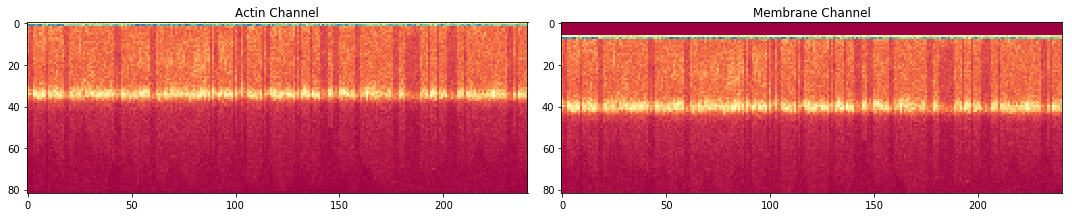

In [7]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


Time point: 0


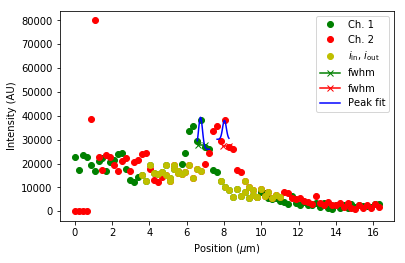

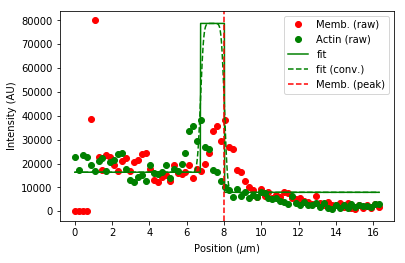

Time point: 100


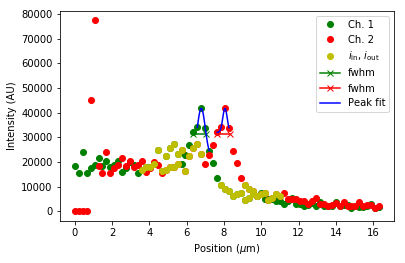

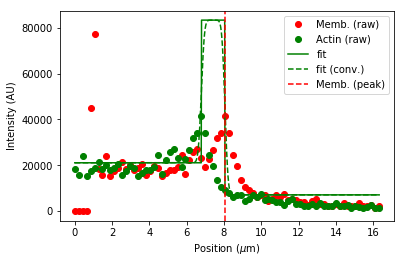

Time point: 200


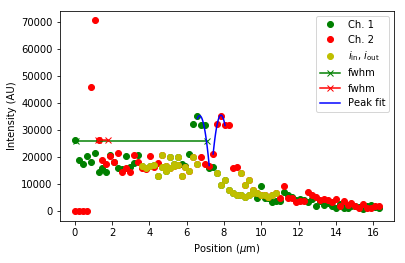

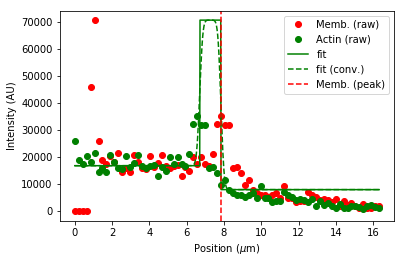

Ransac Slope =  -4.020e-06
Regression Slope =  -4.020e-06
Mean Thickness (After outlier removal) =  0.256 um


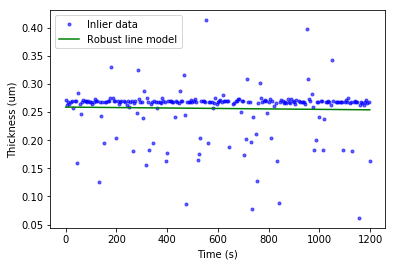

CPU times: user 4min 14s, sys: 2.42 s, total: 4min 17s
Wall time: 4min 31s


In [8]:
%%time
Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, FitaroundInside, FitaroundOutside, psf, inisigmaguess)
Thickness_time = np.column_stack([Time, Thickness])

show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)